## Group 15 - Final Project: EDA

In [1]:
# packages
library(dplyr)
library(tidyverse)
library(ggplot2)
library(ggpubr)
library(e1071)
library(ROCR)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ stringr 1.4.0
✔ tidyr   1.1.3     ✔ forcats 0.5.1
✔ readr   2.0.1     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
# data loading
data <- read.csv("hcv.csv") %>%
        select(-X) %>%
        select(Category, Age, AST, CHE, ALB, GGT) %>%
        filter(Category != "0s=suspect Blood Donor") %>%
        mutate(Category = case_when(Category == "0=Blood Donor" ~ "BD",
                                    Category == "1=Hepatitis" ~ "H",
                                    Category == "2=Fibrosis" ~ "F",
                                    Category == "3=Cirrhosis" ~ "C"),
               Category = as.factor(Category)) %>%
        na.omit()

In [4]:
summary(data)

 Category      Age             AST              CHE              ALB       
 BD:533   Min.   :19.00   Min.   : 12.00   Min.   : 1.420   Min.   :20.00  
 C : 29   1st Qu.:39.00   1st Qu.: 21.60   1st Qu.: 6.950   1st Qu.:39.00  
 F : 21   Median :47.00   Median : 25.80   Median : 8.270   Median :42.00  
 H : 24   Mean   :47.26   Mean   : 34.34   Mean   : 8.206   Mean   :41.82  
          3rd Qu.:54.00   3rd Qu.: 32.70   3rd Qu.: 9.590   3rd Qu.:45.25  
          Max.   :77.00   Max.   :324.00   Max.   :16.410   Max.   :82.20  
      GGT        
 Min.   :  4.50  
 1st Qu.: 15.70  
 Median : 23.20  
 Mean   : 38.13  
 3rd Qu.: 39.00  
 Max.   :650.90  

In [5]:
# extract only continuous variables & category
continuous <- data %>%
                select_if(is.numeric)
continuous <- cbind(continuous, Category = data[,1])

# arrays for boxplots
bps <- vector("list", ncol(continuous)-1)

# column names
cols<-colnames(continuous)

In [6]:
library(GGally)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [14]:
# produce box plots of selected variables
for(i in 1:(ncol(continuous)-1)){
    data. <- continuous[,c(i, ncol(continuous))]
    var <- colnames(data.)[1]
    liver_bp <- continuous[,c(i, ncol(continuous))] %>%
                        gather(key = "variables", value = "value", -Category)

    bps[[i]] <- ggplot(data = liver_bp) + 
                    geom_boxplot(aes(x = Category, y = value)) + 
                    facet_wrap(~ variables, scales = "free", nrow = 1) +
                    labs(x = Category, y = var) + theme_bw() +
                    #ggtitle(paste0("Boxplot of ", var, " and Category", sep = "")) +
                    theme(plot.title = element_text(hjust=.5, size=9))
}

In [15]:
library(ggpubr)

Saving 7 x 7 in image



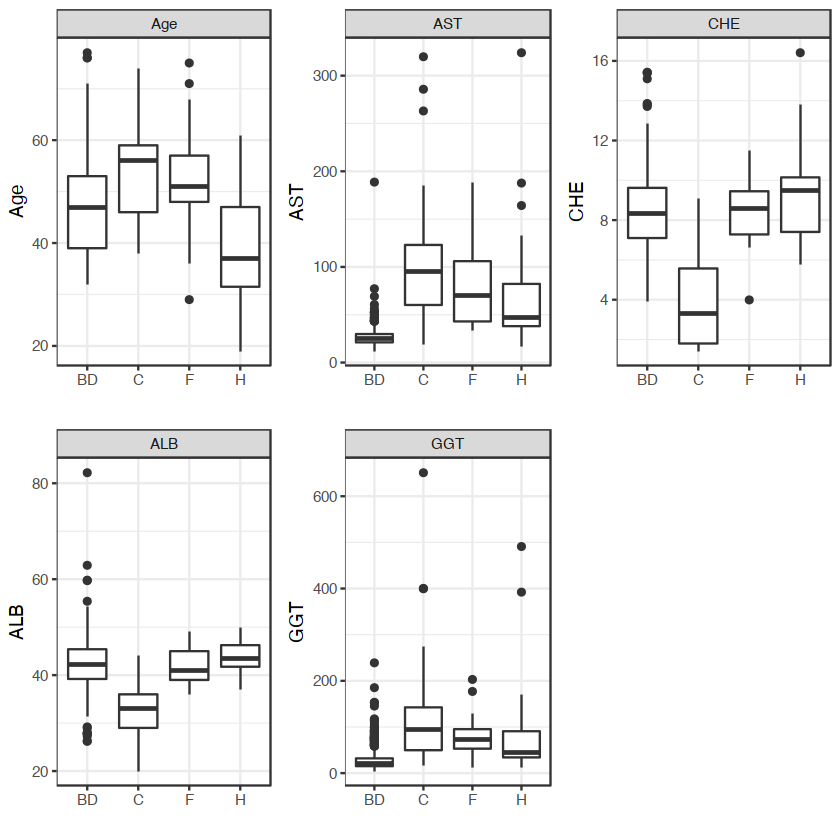

In [17]:
# save a box plot as an image
options(reper.plot.width = 40, reper.plot.height = 20)
ggarrange(plotlist = bps[1:5], ncol = 3, nrow = 2, common.legend = TRUE)
# ggsave(file = "boxplot.png")
# dev.off()

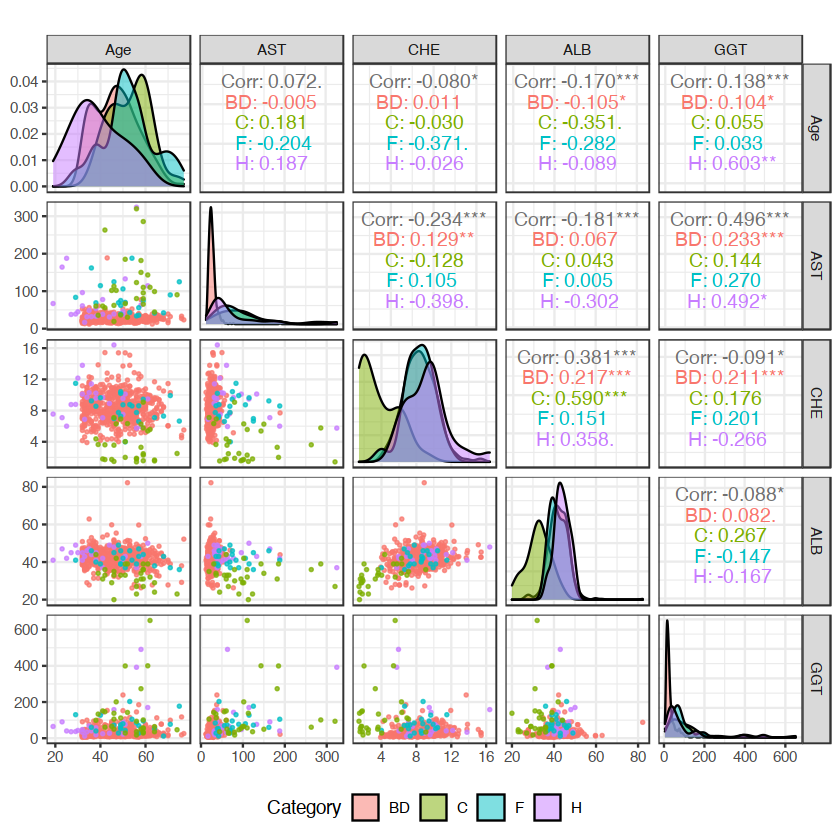

In [29]:
# Open a pdf file
# pdf("pairplot.jpg", width = 350, height = "350")
options(reper.plot.width = 60, reper.plot.height = 20)
cols <- colnames(data[,2:6])
ggpairs(continuous, columns = cols,
        mapping = aes(color = Category), lower = list(continuous = wrap("points", alpha = .75, size = .5)),
        diag = list(continuous = wrap("densityDiag", alpha = .5)), upper = list(continuous = wrap("cor", size = 4)),
        title = "", legend = 1) + theme_bw() + 
        theme(plot.title = element_text(size = 10, hjust = 0.5), legend.position = "bottom")
ggsave(file = "pair_plot.png", width = 9, height = 6, dpi = 150, units = "in", device='png')
# Close a pdf file
# dev.off()

In [77]:
# take log for some variables
bps_2 <- vector("list", ncol(continuous)-1)

for(i in 1:(ncol(continuous)-1)){
    
    if(i == 9){
        data. <- continuous[,c(i, ncol(continuous))]
        data.[,1] = log(data.[,1])
    }else{
        data. <- continuous[,c(i, ncol(continuous))]
    } 
     var <- colnames(data.)[1]
     liver_bp <- data. %>% gather(key = "variables", value = "value", -Category)

     bps_2[[i]] <- ggplot(data = liver_bp) + 
                         geom_boxplot(aes(x = Category, y = value)) + 
                         labs(x = "Category", y = var) + theme_bw() +
                         ggtitle(paste0("Boxplot of ", var, " and Category", sep = "")) +
                         theme(plot.title = element_text(hjust=.5, size=9))
}

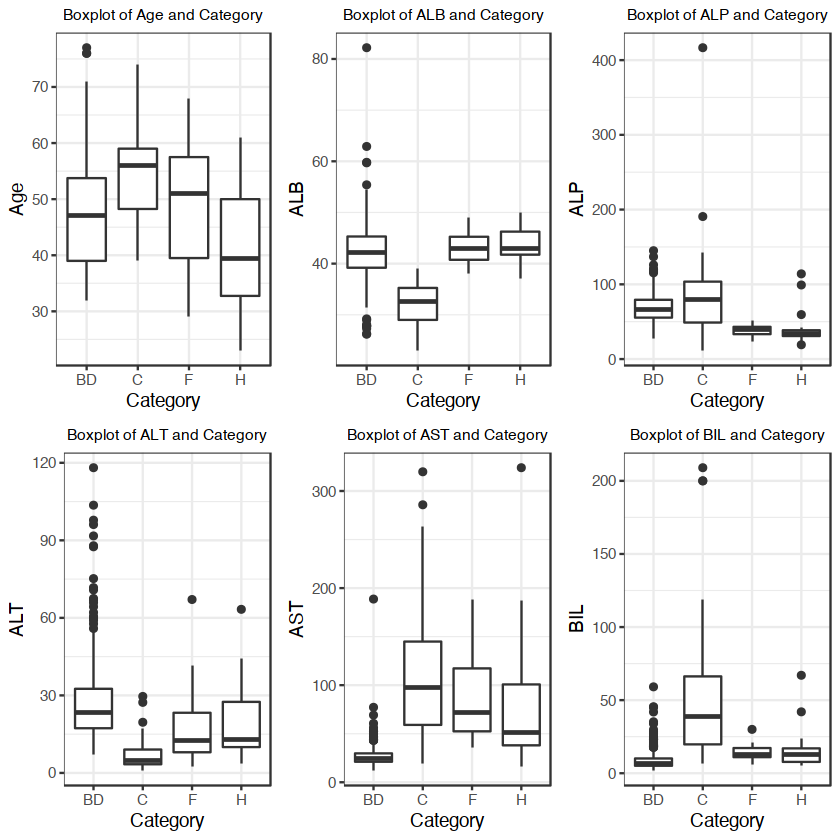

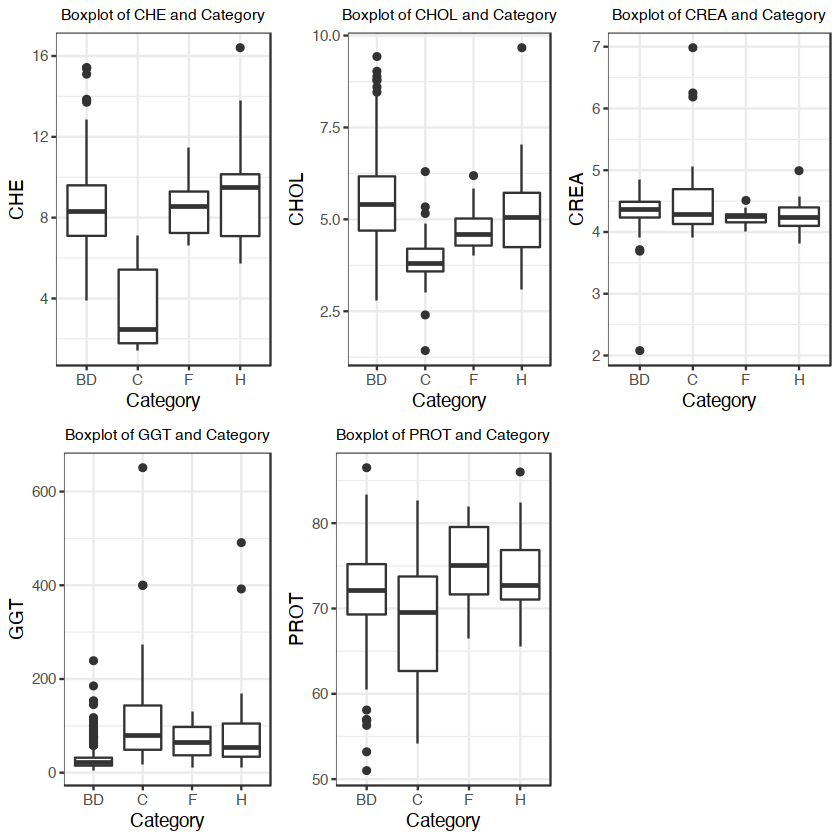

In [78]:
options(reper.plot.width = 40, reper.plot.height = 20)
ggarrange(plotlist = bps_2[1:6], ncol = 3, nrow = 2)
ggarrange(plotlist = bps_2[7:11], ncol = 3, nrow = 2)